- date : 2020.3.21
- author : jiwon Jang  

- breath first search를 이용하여 탐색
- 계산 복잡도 고민

[Reference]
- bfs, dfs : https://itholic.github.io/python-bfs-dfs/

In [1]:
graph = {
    'A': ['B'],
    'B': ['A', 'C', 'H'],
    'C': ['B', 'D'],
    'D': ['C', 'E', 'G'],
    'E': ['D', 'F'],
    'F': ['E'],
    'G': ['D'],
    'H': ['B', 'I', 'J', 'M'],
    'I': ['H'],
    'J': ['H', 'K'],
    'K': ['J', 'L'],
    'L': ['K'],
    'M': ['H']
}

In [2]:
graph

{'A': ['B'],
 'B': ['A', 'C', 'H'],
 'C': ['B', 'D'],
 'D': ['C', 'E', 'G'],
 'E': ['D', 'F'],
 'F': ['E'],
 'G': ['D'],
 'H': ['B', 'I', 'J', 'M'],
 'I': ['H'],
 'J': ['H', 'K'],
 'K': ['J', 'L'],
 'L': ['K'],
 'M': ['H']}

# BFS
- BFS 방식으로 모든 점을 시작점에서 순회

In [26]:
def bfs(graph, start_node):
    visit = list() # 방문했던 노드를 저장할 목록
    queue = list() # 방문할 노드의 목록을 저장할 리스트
    queue.append(start_node) # 시작 노트를 넣어줌
    
    while queue:
#         print(queue)
        node = queue.pop(0)
        if node not in visit:
            visit.append(node)
            queue.extend(graph[node]) # graph[node] : 해당 노드에 연결된 노드 값을 불러옴
#         print('visit:', visit)
        
    return visit


In [27]:
bfs(graph, 'A')

['A', 'B', 'C', 'H', 'D', 'I', 'J', 'M', 'E', 'G', 'K', 'F', 'L']

# DFS
- DFS 방식으로 모든 점을 시작점에서 순회

In [28]:
def dfs(graph, start_node):
    visit = list()
    stack = list()
    
    stack.append(start_node)
    
    while stack:
        node = stack.pop()
        if node not in visit:
            visit.append(node)
            stack.extend(graph[node])
            
    return visit

In [29]:
dfs(graph, 'A')

['A', 'B', 'H', 'M', 'J', 'K', 'L', 'I', 'C', 'D', 'G', 'E', 'F']

# Networkx - BFS, DFS
- date : 2020.3.31
- author : Jiwon Jang

[reference]
- DFS(Depth First Search)와 BFS(Breadth First Search), https://smlee729.github.io/python/network%20analysis/2015/04/09/1-networkx-dfs-bfs.html

In [20]:
import numpy as np

In [1]:
import networkx as nx
from networkx.generators.small import krackhardt_kite_graph

g = krackhardt_kite_graph() #g는 graph객체가 됩니다.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


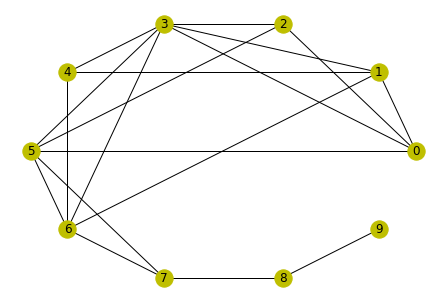

In [15]:
%matplotlib inline
nx.draw_circular(g, node_color='y', with_labels=True)

In [2]:
g

In [7]:
g.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

In [8]:
g.number_of_edges()

18

In [9]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [10]:
g.number_of_nodes()

10

In [18]:
g[0]

AtlasView({1: {}, 2: {}, 3: {}, 5: {}})

In [19]:
g.adj

AdjacencyView({0: {1: {}, 2: {}, 3: {}, 5: {}}, 1: {0: {}, 3: {}, 4: {}, 6: {}}, 2: {0: {}, 3: {}, 5: {}}, 3: {0: {}, 1: {}, 2: {}, 4: {}, 5: {}, 6: {}}, 4: {1: {}, 3: {}, 6: {}}, 5: {0: {}, 2: {}, 3: {}, 6: {}, 7: {}}, 6: {1: {}, 3: {}, 4: {}, 5: {}, 7: {}}, 7: {5: {}, 6: {}, 8: {}}, 8: {7: {}, 9: {}}, 9: {8: {}}})

In [23]:
nx.to_numpy_matrix(g)

matrix([[0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [29]:
for i in g.neighbors(1): # 노드 1의 인접 노드 조회
    print(i)

0
3
4
6


In [30]:
def BFS_Node(graph, node, visited=[]):
    queue = [node]
    visited.append(node)
    while len(queue) > 0:
        dequeued = queue.pop(0)
        for neighbor in graph.neighbors(dequeued):
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

In [31]:
BFS_Node(g, 0)

[0, 1, 2, 3, 5, 4, 6, 7, 8, 9]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


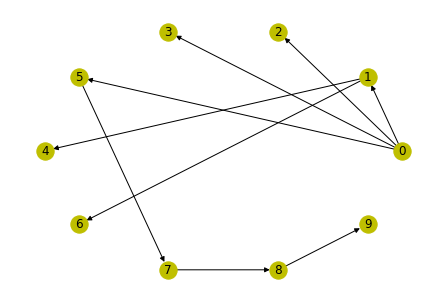

In [32]:
bfs_tree = nx.algorithms.traversal.bfs_tree(g, 0) #0번 노드부터 시작합니다.
nx.draw_circular(bfs_tree, node_color='y', with_labels=True)